This was a trial into using CNNs and transfer learning. The objective was to take a small flower dataset from: http://download.tensorflow.org/example_images/flower_photos.tgz and utilize the VGG16 CNN architecture on it. 

In [2]:
# imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [0]:
#import split_folders

In [0]:
#split_folders.ratio("flower_photos", "flower_photos_three_split", seed=42, ratio=(.7, .2, .1))

In [0]:
# images

train = "flower_photos_three_split/train"
test = "flower_photos_three_split/test"
val = "flower_photos_three_split/val"

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=(150,150),
                                                    batch_size=5,class_mode='categorical')

Found 2571 images belonging to 5 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(val,
                                                  target_size=(150,150),
                                                  batch_size=5,class_mode='categorical')

Found 731 images belonging to 5 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5, 5)


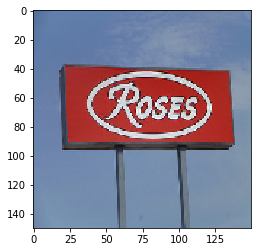

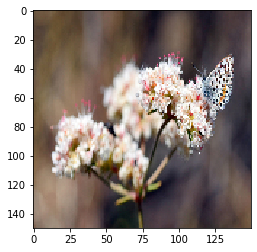

In [13]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
i = 0
for batch in train_generator:
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0][0]))
    i += 1
    if i % 2 == 0:
        break

In [14]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [15]:
from keras.applications import vgg16
vgg_model = vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 6s 0us/step








In [16]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [17]:
for layers in (vgg_model.layers):
    print(layers)
    layers.trainable = False

In [18]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import keras
model = Sequential()
for i in vgg_model.layers:
    model.add(i)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [21]:
history = model.fit_generator(train_generator,
                             #steps_per_epoch=train_generator.batch_size,
                             epochs=10,
                             validation_data=test_generator,
                             #validation_steps=test_generator.batch_size,
                             verbose=1,
                             use_multiprocessing=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
515/515 [==============================] - 1932s 4s/step - loss: 2.0183 - acc: 0.5701 - val_loss: 1.3182 - val_acc: 0.6731
Epoch 2/10
515/515 [==============================] - 36s 70ms/step - loss: 1.3308 - acc: 0.6450 - val_loss: 1.1763 - val_acc: 0.7073
Epoch 3/10
515/515 [==============================] - 36s 70ms/step - loss: 1.3159 - acc: 0.6322 - val_loss: 1.1954 - val_acc: 0.6963
Epoch 4/10
515/515 [==============================] - 36s 70ms/step - loss: 1.3133 - acc: 0.6295 - val_loss: 1.1126 - val_acc: 0.7538
Epoch 5/10
515/515 [==============================] - 36s 70ms/step - loss: 1.2932 - acc: 0.6373 - val_loss: 1.1034 - val_acc: 0.7114
Epoch 6/10
515/515 [==============================] - 36s 70ms/step - loss: 1.2596 - acc: 0.6330 - val_loss: 1.1931 - val_acc: 0.6539
Epoch 7/10
515/515 [==============================] - 36s 70ms/step - loss: 1.2871 - acc: 0.6159 - v

In [22]:
val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(val,target_size=(150,150),
                                                    batch_size=5,class_mode='categorical')

Found 731 images belonging to 5 classes.


In [23]:
validation_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [0]:
reversed_dictionary = dict(map(reversed, validation_generator.class_indices.items()))

In [25]:
reversed_dictionary

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [0]:
preds = model.predict_generator(validation_generator)

In [27]:
predictions = []
for i in preds:
    print(reversed_dictionary[i.argmax()])
    predictions.append(reversed_dictionary[i.argmax()])
print(predictions)

dandelion
dandelion
tulips
dandelion
sunflowers
sunflowers
dandelion
tulips
tulips
dandelion
sunflowers
tulips
daisy
dandelion
tulips
roses
dandelion
dandelion
dandelion
dandelion
tulips
dandelion
dandelion
tulips
dandelion
dandelion
dandelion
daisy
roses
dandelion
daisy
daisy
dandelion
tulips
tulips
tulips
roses
dandelion
sunflowers
sunflowers
dandelion
daisy
dandelion
tulips
dandelion
tulips
sunflowers
tulips
dandelion
daisy
dandelion
tulips
sunflowers
sunflowers
roses
sunflowers
tulips
tulips
tulips
tulips
roses
tulips
roses
sunflowers
dandelion
sunflowers
sunflowers
roses
roses
dandelion
dandelion
roses
tulips
dandelion
daisy
sunflowers
tulips
sunflowers
tulips
dandelion
dandelion
roses
sunflowers
tulips
roses
sunflowers
dandelion
dandelion
tulips
dandelion
daisy
roses
dandelion
roses
dandelion
tulips
daisy
dandelion
sunflowers
dandelion
dandelion
tulips
tulips
tulips
dandelion
sunflowers
daisy
dandelion
dandelion
tulips
tulips
tulips
daisy
sunflowers
sunflowers
tulips
daisy
dandel

In [28]:
type(predictions)

list

In [29]:
validation_generator.filenames

['daisy/100080576_f52e8ee070_n.jpg',
 'daisy/10140303196_b88d3d6cec.jpg',
 'daisy/10437770546_8bb6f7bdd3_m.jpg',
 'daisy/10466290366_cc72e33532.jpg',
 'daisy/1140299375_3aa7024466.jpg',
 'daisy/11891885265_ccefec7284_n.jpg',
 'daisy/1265350143_6e2b276ec9.jpg',
 'daisy/1286274236_1d7ac84efb_n.jpg',
 'daisy/1342002397_9503c97b49.jpg',
 'daisy/1355787476_32e9f2a30b.jpg',
 'daisy/13826249325_f61cb15f86_n.jpg',
 'daisy/14021430525_e06baf93a9.jpg',
 'daisy/14073784469_ffb12f3387_n.jpg',
 'daisy/14088053307_1a13a0bf91_n.jpg',
 'daisy/14219214466_3ca6104eae_m.jpg',
 'daisy/14272874304_47c0a46f5a.jpg',
 'daisy/14333681205_a07c9f1752_m.jpg',
 'daisy/14354051035_1037b30421_n.jpg',
 'daisy/14421389519_d5fd353eb4.jpg',
 'daisy/14471433500_cdaa22e3ea_m.jpg',
 'daisy/14591326135_930703dbed_m.jpg',
 'daisy/14707111433_cce08ee007.jpg',
 'daisy/14907815010_bff495449f.jpg',
 'daisy/153210866_03cc9f2f36.jpg',
 'daisy/15784493690_b1858cdb2b_n.jpg',
 'daisy/15813862117_dedcd1c56f_m.jpg',
 'daisy/163978992_8

In [0]:
import pandas as pd
filenames=validation_generator.filenames


In [0]:
filenames_2 = []
for i in filenames:
    filenames_2.append(i.split("/")[0])

In [0]:
results=pd.DataFrame({"Filename":filenames_2,
                      "Predictions":predictions})

In [33]:
results

,Filename,Predictions
0,daisy,dandelion
1,daisy,dandelion
2,daisy,tulips
3,daisy,dandelion
4,daisy,sunflowers
...,...,...
726,tulips,sunflowers
727,tulips,sunflowers
728,tulips,tulips
729,tulips,roses


In [34]:
results['Filename'] = results['Filename'].map({'daisy': 1, 'dandelion': 2, 'roses': 3, 'sunflowers': 4, 'tulips': 5})
results['Predictions'] = results['Predictions'].map({'daisy': 1, 'dandelion': 2, 'roses': 3, 'sunflowers': 4, 'tulips': 5})
results

,Filename,Predictions
0,1,2
1,1,2
2,1,5
3,1,2
4,1,4
...,...,...
726,5,4
727,5,4
728,5,5
729,5,3


In [35]:
results['correct'] = results['Filename']/results['Predictions']
results

,Filename,Predictions,correct
0,1,2,0.500000
1,1,2,0.500000
2,1,5,0.200000
3,1,2,0.500000
4,1,4,0.250000
...,...,...,...
726,5,4,1.250000
727,5,4,1.250000
728,5,5,1.000000
729,5,3,1.666667


In [36]:
results[results['correct'] == 1]

,Filename,Predictions,correct
12,1,1,1.0
27,1,1,1.0
30,1,1,1.0
31,1,1,1.0
41,1,1,1.0
...,...,...,...
709,5,5,1.0
721,5,5,1.0
723,5,5,1.0
728,5,5,1.0


In [38]:
152/731

0.2079343365253078

The model got 20.79% correct on the validation data. This is fairly different than the results within the training and testing data. The training accuracy fluctuated in the low 60% range, and the validation accuracy flutuated around the 65-70% range. This tell us that there might be an issue with the model overfitting seeing as it did not generalize well on the held out validation data. In order to improve the model, we could tune the hyperparameters or look to gather more data. Another method we could try is to unfreeze layers within the VGG16 model and train the architecture on the data, or try another CNN architecture altogether.